In [17]:
import re
import os
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

home = os.path.expanduser("~")
data_dir = os.path.join(home, 'Documents/semantic-robot/testing/mistral')

### Extract necessary data

In [10]:
def extract_data(filename):
    with open(filename) as f:
        content = f.read()

    test_sets = re.findall(r'Test set #\s+:\s+(.+)', content)
    number_of_examples = re.findall(r'Number of examples\s+:\s+(.+)', content)
    inference_times = re.findall(r'Inference time \[s\]\s+:\s+(.+)', content)
    memory_usage = re.findall(r'GPU memory loaded \[MB\]\s+:\s+(.+)', content)
    input_size = re.findall(r'Model input size \[MB\]\s+:\s+(.+)', content)
    model = re.findall(r'Model\s+:\s+(.+)', content)
    instance_match_accuracy = re.findall(r'Instance match accuracy\s+:\s+(.+)', content)
    predicate_match_accuracy = re.findall(r'Predicate match accuracy\s+:\s+(.+)', content)
    goal_match_accuracy = re.findall(r'Goal match accuracy\s+:\s+(.+)', content)
    total_match_accuracy = re.findall(r'Total match accuracy\s+:\s+(.+)', content)
    labeled = re.findall(r'Labeled\s+:\s+(.+)', content)

    return {
        'model': list(map(str, model)),
        'test_set': list(map(int, test_sets)),
        'num_examples': list(map(int, number_of_examples)),
        'instance_match_accuracy': list(map(float, instance_match_accuracy)),
        'predicate_match_accuracy': list(map(float, predicate_match_accuracy)),
        'goal_match_accuracy': list(map(float, goal_match_accuracy)),
        'total_match_accuracy': list(map(float, total_match_accuracy)),
        'inference_time': list(map(float, inference_times)),
        'memory_usage': list(map(float, memory_usage)),
        'input_size': list(map(float, input_size)),
        'labeled': list(map(str, labeled))
    }

### Read files of results from 4-bit, 8-bit, half and full precision for both labeled and unlabeled examples

In [11]:
num = '4'

data_4bit = extract_data(os.path.join(data_dir, num + 'mistral_results_4bit.txt'))
data_4bit_labeled = extract_data(os.path.join(data_dir, num + 'mistral_results_4bit_labeled.txt'))

data_8bit = extract_data(os.path.join(data_dir, num + 'mistral_results_8bit.txt'))
data_8bit_labeled = extract_data(os.path.join(data_dir, num + 'mistral_results_8bit_labeled.txt'))

data_half_precision = extract_data(os.path.join(data_dir, num + 'mistral_results_half_precision.txt'))
data_half_precision_labeled = extract_data(os.path.join(data_dir, num + 'mistral_results_half_precision_labeled.txt'))

data_full_precision = extract_data(os.path.join(data_dir, num + 'mistral_results_full_precision.txt'))
data_full_precision_labeled = extract_data(os.path.join(data_dir, num + 'mistral_results_full_precision_labeled.txt'))

df_4bit = pd.DataFrame(data_4bit)
df_4bit_labeled = pd.DataFrame(data_4bit_labeled)

df_8bit = pd.DataFrame(data_8bit)
df_8bit_labeled = pd.DataFrame(data_8bit_labeled)

df_half_precision = pd.DataFrame(data_half_precision)
df_half_precision_labeled = pd.DataFrame(data_half_precision_labeled)

df_full_precision = pd.DataFrame(data_full_precision)
df_full_precision_labeled = pd.DataFrame(data_full_precision_labeled)

### 4-bit unlabeled

In [13]:
inst_matches = np.zeros(max(df_4bit['num_examples']))
pred_matches = np.zeros(max(df_4bit['num_examples']))
goal_matches = np.zeros(max(df_4bit['num_examples']))
tot_matches = np.zeros(max(df_4bit['num_examples']))
inf_times = np.zeros(max(df_4bit['num_examples']))
mem_usages = np.zeros(max(df_4bit['num_examples']))
input_sizes = np.zeros(max(df_4bit['num_examples']))

for i in range(2, max(df_4bit['num_examples'])):
    idxs = df_4bit.loc[df_4bit['num_examples'] == i]
    
    instance_match_accuracy = [float(x) for x in idxs['instance_match_accuracy']]
    if instance_match_accuracy:
        avg_instance_match_accuracy = sum(instance_match_accuracy) / len(instance_match_accuracy)
    else:
        avg_instance_match_accuracy = 0

    predicate_match_accuracy = [float(x) for x in idxs['predicate_match_accuracy']]
    if predicate_match_accuracy:    
        avg_predicate_match_accuracy = sum(predicate_match_accuracy) / len(predicate_match_accuracy)
    else:
        avg_predicate_match_accuracy = 0

    goal_match_accuracy = [float(x) for x in idxs['goal_match_accuracy']]
    if goal_match_accuracy:    
        avg_goal_match_accuracy = sum(goal_match_accuracy) / len(goal_match_accuracy)
    else:
        avg_goal_match_accuracy = 0

    total_match_accuracy = [float(x) for x in idxs['total_match_accuracy']]
    if total_match_accuracy:    
        avg_total_match_accuracy = sum(total_match_accuracy) / len(total_match_accuracy)
    else:
        avg_total_match_accuracy = 0
    
    inference_times = [float(x) for x in idxs['inference_time']]
    if inference_times:
        avg_inference_time = sum(inference_times) / len(inference_times)
    else:
        avg_inference_time = 0

    memory_usage = [float(x) for x in idxs['memory_usage']]
    if memory_usage:    
        avg_memory_usage = sum(memory_usage) / len(memory_usage)
    else:
        avg_memory_usage = 0

    input_size = [float(x) for x in idxs['input_size']]
    if input_size:    
        avg_input_size = sum(input_size) / len(input_size)
    else:
        avg_input_size = 0


    inst_matches[i-2] = avg_instance_match_accuracy
    pred_matches[i-2] = avg_predicate_match_accuracy
    goal_matches[i-2] = avg_goal_match_accuracy
    tot_matches[i-2] = avg_total_match_accuracy
    inf_times[i-2] = avg_inference_time
    mem_usages[i-2] = avg_memory_usage
    input_sizes[i-2] = avg_input_size

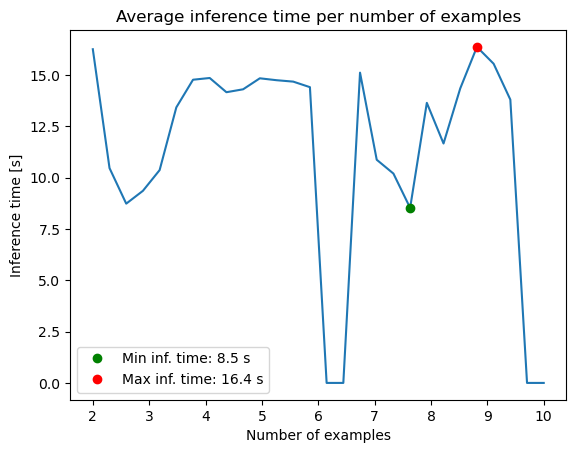

In [23]:
x = np.linspace(2, 10, len(inf_times))
plt.plot(x, inf_times)
plt.title('Average inference time per number of examples')
plt.xlabel('Number of examples')
plt.ylabel('Inference time [s]')

min_inf_time = min(x for x in inf_times if x != 0)
max_inf_time = max(inf_times)
min_inf_time_idx = np.where(inf_times == min_inf_time)
max_inf_time_idx = np.where(inf_times == max_inf_time)

plt.plot(x[min_inf_time_idx], min_inf_time, 'go', label=f'Min inf. time: {round(min_inf_time, 1)} s')
plt.plot(x[max_inf_time_idx], max_inf_time, 'ro', label=f'Max inf. time: {round(max_inf_time, 1)} s')
plt.legend()

plt.show()

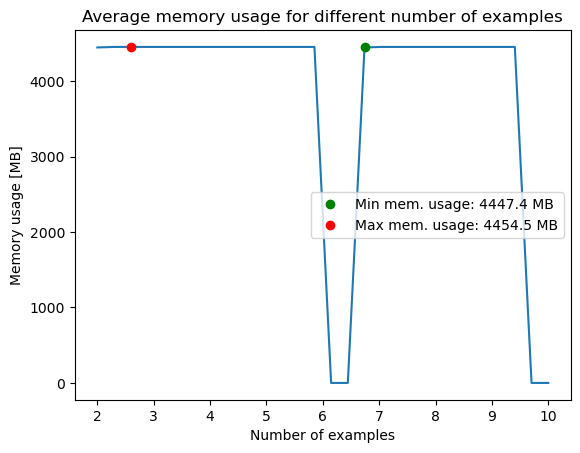

In [27]:
x = np.linspace(2, 10, len(mem_usages))
plt.plot(x, mem_usages)
plt.title('Average memory usage for different number of examples')
plt.xlabel('Number of examples')
plt.ylabel('Memory usage [MB]')

min_mem_usage = min(x for x in mem_usages if x != 0)
max_mem_usage = max(mem_usages)
min_mem_usage_idx = np.where(mem_usages == min_mem_usage)
max_mem_usage_idx = np.where(mem_usages == max_mem_usage)

plt.plot(x[min_mem_usage_idx[0]][random.randint(0, len(min_mem_usage_idx))], min_mem_usage, 'go', label=f'Min mem. usage: {round(min_mem_usage, 1)} MB')
plt.plot(x[max_mem_usage_idx[0]][random.randint(0, len(min_mem_usage_idx))], max_mem_usage, 'ro', label=f'Max mem. usage: {round(max_mem_usage, 1)} MB')
plt.legend()

plt.show()

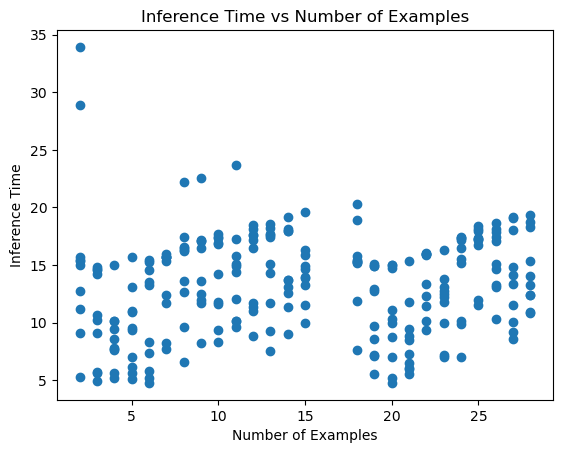

In [30]:
num_examples = np.linspace(2, 10, len(inference_times))
plt.scatter(data_4bit['num_examples'], data_4bit['inference_time'])
plt.xlabel('Number of Examples')
plt.ylabel('Inference Time')
plt.title('Inference Time vs Number of Examples')
plt.show()

### 4-bit labeled

### 8-bit unlabeled

### 8-bit labeled

### Half precision unlabeled

### Half precision labeled

### Full precision unlabeled

### Full precision labeled